<a href="https://colab.research.google.com/github/xszaraz/oznal/blob/master/Copy_of_OZNAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = '/content/gdrive/My Drive/dataset'

In [4]:
!pip install pandas
!pip install numpy
!pip install ipython-autotime

%load_ext autotime

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import math as mth

hospital_df = pd.read_csv("/content/gdrive/My Drive/dataset/hospital.csv")
pd.set_option("display.max_columns",None)
pd.set_option('max_colwidth', 999)
hospital_df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Elective,Hosp Basd Medicare Approved Swing Bed,2015,55,Fluid and electrolyte disorders,0,NO PROC,422,Hypovolemia & related electrolyte disorders,10,"Endocrine, Nutritional and Metabolic Diseases and Disorders",2,Moderate,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),202,ELECTROCARDIOGRAM,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,55,Fluid and electrolyte disorders,0,NO PROC,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,2,Moderate,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89


time: 28 s


In [6]:
hospital_df.loc[hospital_df['Total Costs'].between(0,10000), 'Total Costs'] = 1
hospital_df.loc[hospital_df['Total Costs'].between(10000.01,20000), 'Total Costs'] = 2
hospital_df.loc[hospital_df['Total Costs'] > 20000.01, 'Total Costs'] = 3

time: 110 ms


In [7]:
hospital_df['Total Costs'].value_counts()

1.0    1368957
2.0     548392
3.0     429582
Name: Total Costs, dtype: int64

time: 38.4 ms


In [8]:
hospital_df = hospital_df.drop(columns=['Ethnicity','Health Service Area','Hospital County','Facility Name', 'Facility Id', 'Zip Code - 3 digits', 'Operating Certificate Number', 'Discharge Year', 'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3', 'Total Charges'])

time: 291 ms


In [9]:
hospital_df

,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
0,70 or Older,F,White,4,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Moderate,Minor,Medical,0,N,Y,1.0
1,70 or Older,F,White,4,Elective,Hosp Basd Medicare Approved Swing Bed,Fluid and electrolyte disorders,NO PROC,Hypovolemia & related electrolyte disorders,"Endocrine, Nutritional and Metabolic Diseases and Disorders",Moderate,Moderate,Medical,0,N,Y,1.0
2,70 or Older,F,White,4,Urgent,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),ELECTROCARDIOGRAM,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical,0,N,Y,1.0
3,50 to 69,F,White,2,Elective,Home or Self Care,Fluid and electrolyte disorders,NO PROC,"Other gastroenteritis, nausa & vomiting",Diseases and Disorders of the Digestive System,Moderate,Minor,Medical,0,N,Y,1.0
4,70 or Older,M,White,2,Elective,Home or Self Care,Pneumonia (except that caused by tuberculosis or sexually transmitted disease),NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Minor,Moderate,Medical,0,N,Y,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,70 or Older,M,White,2,Emergency,Home or Self Care,Transient cerebral ischemia,NO PROC,Transient ischemia,Diseases and Disorders of the Nervous System,Moderate,Moderate,Medical,0,N,Y,1.0
2346927,50 to 69,M,White,1,Emergency,Home or Self Care,Gout and other crystal arthropathies,OT DX PRCS ON MUSC/SKEL,Other musculoskeletal system & connective tissue diagnoses,Diseases and Disorders of the Musculoskeletal System and Conn Tissue,Minor,Minor,Medical,0,N,Y,1.0
2346928,50 to 69,M,White,2,Urgent,Home or Self Care,Mood disorders,NO PROC,Major depressive disorders & other/unspecified psychoses,Mental Diseases and Disorders,Minor,Minor,Medical,0,N,N,1.0
2346929,70 or Older,M,White,1,Emergency,Home or Self Care,Cardiac dysrhythmias,NO PROC,Cardiac arrhythmia & conduction disorders,Diseases and Disorders of the Circulatory System,Minor,Moderate,Medical,0,N,Y,1.0


time: 41.5 ms


In [10]:
#check if some values contains null
hospital_df['Age Group'].isnull().values.any()
hospital_df['Gender'].isnull().values.any()
hospital_df['Race'].isnull().values.any()
hospital_df['Type of Admission'].isnull().values.any()
hospital_df['Patient Disposition'].isnull().values.any()
hospital_df['CCS Diagnosis Description'].isnull().values.any()
hospital_df['CCS Procedure Description'].isnull().values.any()
hospital_df['APR DRG Description'].isnull().values.any()
hospital_df['APR MDC Description'].isnull().values.any()
hospital_df['APR Medical Surgical Description'].isnull().values.any()
hospital_df['Birth Weight'].isnull().values.any()
hospital_df['Abortion Edit Indicator'].isnull().values.any()
hospital_df['Emergency Department Indicator'].isnull().values.any()
hospital_df['Total Costs'].isnull().values.any()

False

time: 1.02 s


In [11]:
#check how much values is missing
hospital_df['APR Severity of Illness Description'].isnull().sum()

111

time: 105 ms


In [12]:
#check how much values is missing
hospital_df['APR Risk of Mortality'].isnull().sum()

111

time: 80.6 ms


In [13]:
#check the rows with missing values 
hospital_df[hospital_df['APR Severity of Illness Description'].isnull()]

,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
73502,0 to 17,M,White,8,Newborn,Home w/ Home Health Services,Liveborn,CIRCUMCISION,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,2200,N,N,1.0
268463,0 to 17,M,Black/African American,1,Newborn,Short-term Hospital,Liveborn,RESP INTUB/MECH VENTIL,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,2200,N,N,1.0
269563,0 to 17,M,Black/African American,1,Newborn,Expired,Liveborn,NO PROC,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,1500,N,N,1.0
276090,0 to 17,M,Black/African American,1,Newborn,Expired,Liveborn,NO PROC,Ungroupable,Pre-MDC or Ungroupable,NaN,NaN,Not Applicable,1200,N,N,1.0
311511,30 to 49,F,White,4,Emergency,Home or Self Care,Miscellaneous disorders,NO PROC,Principal diagnosis invalid as discharge diagnosis,"Pregnancy, Childbirth and the Puerperium",NaN,NaN,Not Applicable,0,N,Y,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104752,0 to 17,U,White,2,Newborn,Home or Self Care,Liveborn,NO PROC,Principal diagnosis invalid as discharge diagnosis,Newborns and Other Neonates with Conditions Originating in the Perinatal Period,NaN,NaN,Not Applicable,3300,N,N,1.0
2105143,0 to 17,U,White,2,Newborn,Home or Self Care,Liveborn,NO PROC,Principal diagnosis invalid as discharge diagnosis,Newborns and Other Neonates with Conditions Originating in the Perinatal Period,NaN,NaN,Not Applicable,3100,N,N,1.0
2105145,0 to 17,U,White,2,Newborn,Home or Self Care,Liveborn,NO PROC,Principal diagnosis invalid as discharge diagnosis,Newborns and Other Neonates with Conditions Originating in the Perinatal Period,NaN,NaN,Not Applicable,3800,N,N,1.0
2105256,0 to 17,M,White,2,Newborn,Home or Self Care,Liveborn,NO PROC,Principal diagnosis invalid as discharge diagnosis,Newborns and Other Neonates with Conditions Originating in the Perinatal Period,NaN,NaN,Not Applicable,3000,N,N,1.0


time: 125 ms


In [14]:
hospital_df['APR Severity of Illness Description'].unique()

array(['Moderate', 'Minor', 'Major', 'Extreme', nan], dtype=object)

time: 119 ms


In [15]:
hospital_df['APR Risk of Mortality'].unique()

array(['Minor', 'Moderate', 'Major', 'Extreme', nan], dtype=object)

time: 125 ms


In [16]:
#fill the NaN values 
hospital_df['APR Severity of Illness Description'].fillna( method ='ffill', inplace = True) 
hospital_df['APR Risk of Mortality'].fillna( method ='ffill', inplace = True) 

time: 243 ms


In [17]:
hospital_df['APR Severity of Illness Description'].isnull().values.any()
hospital_df['APR Risk of Mortality'].isnull().values.any()

False

time: 182 ms


In [18]:
#We have 2 346 931 samples, but we dont want to predict on all of them because of the time its gonna take
 
#1368957 has value 1 and thats around 58 % of all samples from 2 346 931 samples
#548392 has value 2 and thats around 23 % all samples from 2 346 931 samples
#429582 has value 2 and thats around 19 %  all samples from 2 346 931 samples

#500 000 samples will form our new dataset for predicting and training
#290 000 samples in this new dataset will have value 1
#115 000 samples in this new dataset will have value 2
#95 000 samples in this new dataset will have value 3

#1000 samples will form our new dataset for finding best hyperparameters
#580 samples in this new dataset will have value 1
#230 samples in this new dataset will have value 1
#190 samples in this new dataset will have value 1

#for sample picking we will use dataset.sample()

dataset1 = hospital_df[hospital_df['Total Costs'] == 1]
to_merge1 = dataset1.sample(n = 58000)
to_hyperparameter1 = dataset1.sample(n = 580)
dataset2 = hospital_df[hospital_df['Total Costs'] == 2]
to_merge2 = dataset2.sample(n = 23000)
to_hyperparameter2 = dataset2.sample(n = 230)
dataset3 = hospital_df[hospital_df['Total Costs'] == 3]
to_merge3 = dataset3.sample(n = 19000)
to_hyperparameter3 = dataset3.sample(n = 190)

dataset_merged = pd.concat([to_merge1, to_merge2, to_merge3])
dataset_mergedhyperparameters = pd.concat([to_hyperparameter1, to_hyperparameter2, to_hyperparameter3])

time: 715 ms


In [19]:
#OneHotEncoding
dm_dummies1 = pd.get_dummies(dataset_merged['Age Group'])
dm_dummies2 = pd.get_dummies(dataset_merged['Gender'])
dm_dummies3 = pd.get_dummies(dataset_merged['Race'])
dm_dummies4 = pd.get_dummies(dataset_merged['Type of Admission'])
dm_dummies5 = pd.get_dummies(dataset_merged['Patient Disposition'])
dm_dummies6 = pd.get_dummies(dataset_merged['CCS Diagnosis Description'])
dm_dummies7 = pd.get_dummies(dataset_merged['CCS Procedure Description'])
dm_dummies8 = pd.get_dummies(dataset_merged['APR DRG Description'])
dm_dummies9 = pd.get_dummies(dataset_merged['APR MDC Description'])
dm_dummies10 = pd.get_dummies(dataset_merged['APR Severity of Illness Description'])
dm_dummies11 = pd.get_dummies(dataset_merged['APR Risk of Mortality'])
dm_dummies12 = pd.get_dummies(dataset_merged['APR Medical Surgical Description'])
dm_dummies13 = pd.get_dummies(dataset_merged['Abortion Edit Indicator'])
dm_dummies14 = pd.get_dummies(dataset_merged['Emergency Department Indicator'])

dmhp_dummies1 = pd.get_dummies(dataset_mergedhyperparameters['Age Group'])
dmhp_dummies2 = pd.get_dummies(dataset_mergedhyperparameters['Gender'])
dmhp_dummies3 = pd.get_dummies(dataset_mergedhyperparameters['Race'])
dmhp_dummies4 = pd.get_dummies(dataset_mergedhyperparameters['Type of Admission'])
dmhp_dummies5 = pd.get_dummies(dataset_mergedhyperparameters['Patient Disposition'])
dmhp_dummies6 = pd.get_dummies(dataset_mergedhyperparameters['CCS Diagnosis Description'])
dmhp_dummies7 = pd.get_dummies(dataset_mergedhyperparameters['CCS Procedure Description'])
dmhp_dummies8 = pd.get_dummies(dataset_mergedhyperparameters['APR DRG Description'])
dmhp_dummies9 = pd.get_dummies(dataset_mergedhyperparameters['APR MDC Description'])
dmhp_dummies10 = pd.get_dummies(dataset_mergedhyperparameters['APR Severity of Illness Description'])
dmhp_dummies11 = pd.get_dummies(dataset_mergedhyperparameters['APR Risk of Mortality'])
dmhp_dummies12 = pd.get_dummies(dataset_mergedhyperparameters['APR Medical Surgical Description'])
dmhp_dummies13 = pd.get_dummies(dataset_mergedhyperparameters['Abortion Edit Indicator'])
dmhp_dummies14 = pd.get_dummies(dataset_mergedhyperparameters['Emergency Department Indicator'])

time: 198 ms


In [20]:
#merging OneHotEncoding with the dataset from which OneHotEncodings were made
merged_df = pd.concat([dataset_merged, dm_dummies1, dm_dummies2, dm_dummies3, dm_dummies4, dm_dummies5, dm_dummies6, dm_dummies7, dm_dummies8, dm_dummies9, dm_dummies10, dm_dummies11, dm_dummies12, dm_dummies13, dm_dummies14], axis = 'columns')
merged_df_hp = pd.concat([dataset_mergedhyperparameters, dmhp_dummies1, dmhp_dummies2, dmhp_dummies3, dmhp_dummies4, dmhp_dummies5, dmhp_dummies6, dmhp_dummies7, dmhp_dummies8, dmhp_dummies9, dmhp_dummies10, dmhp_dummies11, dmhp_dummies12, dmhp_dummies13, dmhp_dummies14], axis = 'columns')

time: 317 ms


In [21]:
#dropping the original columns from which OneHotEncodings were made and replacing 120 + with 120 for training and predictioning 
features = merged_df.drop(columns=['Age Group', 'Gender', 'Race', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Abortion Edit Indicator', 'Emergency Department Indicator'])
features['Length of Stay'] = features['Length of Stay'].replace('120 +', '120')

features2 = merged_df_hp.drop(columns=['Age Group', 'Gender', 'Race', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description', 'CCS Procedure Description', 'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Abortion Edit Indicator', 'Emergency Department Indicator'])
features2['Length of Stay'] = features2['Length of Stay'].replace('120 +', '120')

time: 190 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Labels are the values we want to predict
labels = np.array(features['Total Costs'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('Total Costs', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Labels2 are the values we want to predict
labels2 = np.array(features2['Total Costs'])
# Remove the labels from the features
# axis 1 refers to the columns
features2 = features2.drop('Total Costs', axis = 1)
# Saving feature names for later use
feature_list2 = list(features2.columns)
# Convert to numpy array
features2 = np.array(features2)

time: 2.38 s


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

time: 126 ms


In [24]:
#creating arrays for model comparising 
models = []
accuraccies = []
recalls = []
names = []
y_preds = []

time: 1.34 ms


In [25]:
#splitting datas for training, predicting and hyperparamaters searching
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size = 0.25, random_state = 42)

time: 12.5 s


In [26]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train2 = X_train2.astype(int)
X_test2 = X_test2.astype(int)
y_train2 = y_train2.astype(int)
y_test2 = y_test2.astype(int)

time: 1.38 s


In [27]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)
print('Training2 Features Shape:', X_train2.shape)
print('Training2 Labels Shape:', y_train2.shape)
print('Testing2 Features Shape:', X_test2.shape)
print('Testing2 Labels Shape:', y_test2.shape)

Training Features Shape: (75000, 882)
Training Labels Shape: (75000,)
Testing Features Shape: (25000, 882)
Testing Labels Shape: (25000,)
Training2 Features Shape: (750, 582)
Training2 Labels Shape: (750,)
Testing2 Features Shape: (250, 582)
Testing2 Labels Shape: (250,)
time: 10.2 ms


In [28]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

time: 247 ms


In [29]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

time: 5.42 ms


In [30]:
#RandomForestClassifier without optimalization
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.77592, Recall(micro):0.77592

time: 1min 50s


In [31]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.85      0.92      0.88     14539
           2       0.56      0.46      0.51      5726
           3       0.76      0.73      0.74      4735

    accuracy                           0.78     25000
   macro avg       0.72      0.70      0.71     25000
weighted avg       0.76      0.78      0.77     25000

[[13311  1082   146]
 [ 2136  2652   938]
 [  262  1038  3435]]
time: 58.9 ms


In [32]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print("Variable: " + i[0] + ", Importance: " + str(i[1]))

Variable: Length of Stay, Importance: 0.24
Variable: Medical, Importance: 0.03
Variable: Surgical, Importance: 0.03
Variable: White, Importance: 0.02
Variable: Home or Self Care, Importance: 0.02
Variable: NO PROC, Importance: 0.02
Variable: Extreme, Importance: 0.02
Variable: Minor, Importance: 0.02
Variable: Minor, Importance: 0.02
Variable: Birth Weight, Importance: 0.01
Variable: 0 to 17, Importance: 0.01
Variable: 18 to 29, Importance: 0.01
Variable: 30 to 49, Importance: 0.01
Variable: 50 to 69, Importance: 0.01
Variable: 70 or Older, Importance: 0.01
Variable: F, Importance: 0.01
Variable: M, Importance: 0.01
Variable: Black/African American, Importance: 0.01
Variable: Other Race, Importance: 0.01
Variable: Elective, Importance: 0.01
Variable: Emergency, Importance: 0.01
Variable: Home w/ Home Health Services, Importance: 0.01
Variable: Skilled Nursing Home, Importance: 0.01
Variable: OTHER THERAPEUTIC PRCS, Importance: 0.01
Variable: Diseases and Disorders of the Musculoskeleta

In [33]:
models.append('RF')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 2.24 ms


In [34]:
# RandomForestClassifier with GridSearchCV
clf_grid = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth = 20, min_samples_leaf = 1)
clf_grid.fit(X_train, y_train)
y_pred = clf_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.76024, Recall(micro):0.76024

time: 1min 15s


In [35]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.96      0.86     14539
           2       0.59      0.31      0.40      5726
           3       0.77      0.70      0.73      4735

    accuracy                           0.76     25000
   macro avg       0.72      0.65      0.67     25000
weighted avg       0.74      0.76      0.73     25000

[[13950   467   122]
 [ 3111  1759   856]
 [  680   758  3297]]
time: 55.6 ms


In [36]:
# Get numerical feature importances
importances = list(clf_grid.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print("Variable: " + i[0] + ", Importance: " + str(i[1]))

Variable: Length of Stay, Importance: 0.26
Variable: Medical, Importance: 0.06
Variable: Surgical, Importance: 0.06
Variable: NO PROC, Importance: 0.03
Variable: Extreme, Importance: 0.03
Variable: Minor, Importance: 0.03
Variable: Birth Weight, Importance: 0.02
Variable: Home or Self Care, Importance: 0.02
Variable: Major, Importance: 0.02
Variable: Minor, Importance: 0.02
Variable: 0 to 17, Importance: 0.01
Variable: 50 to 69, Importance: 0.01
Variable: 70 or Older, Importance: 0.01
Variable: F, Importance: 0.01
Variable: M, Importance: 0.01
Variable: Black/African American, Importance: 0.01
Variable: Other Race, Importance: 0.01
Variable: White, Importance: 0.01
Variable: Elective, Importance: 0.01
Variable: Emergency, Importance: 0.01
Variable: Newborn, Importance: 0.01
Variable: Home w/ Home Health Services, Importance: 0.01
Variable: Skilled Nursing Home, Importance: 0.01
Variable: Liveborn, Importance: 0.01
Variable: Osteoarthritis, Importance: 0.01
Variable: Neonate birthwt >24

In [37]:
models.append('RF_grid')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 2.31 ms


In [38]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

time: 1.39 ms


In [39]:
clf_gbm = GradientBoostingClassifier()
clf_gbm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

time: 6.14 ms


In [40]:
#GradientBoosting without optimalization
clf_gbm.fit(X_train, y_train)
y_pred = clf_gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.79604, Recall(micro):0.79604

time: 15min 47s


In [41]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.92      0.89     14539
           2       0.58      0.54      0.56      5726
           3       0.81      0.72      0.76      4735

    accuracy                           0.80     25000
   macro avg       0.75      0.73      0.74     25000
weighted avg       0.79      0.80      0.79     25000

[[13364  1126    49]
 [ 1872  3119   735]
 [  172  1145  3418]]
time: 51.8 ms


In [42]:
# Get numerical feature importances
importances = list(clf_gbm.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print("Variable: " + i[0] + ", Importance: " + str(i[1]))

Variable: Length of Stay, Importance: 0.61
Variable: Surgical, Importance: 0.19
Variable: NO PROC, Importance: 0.02
Variable: Mental Diseases and Disorders, Importance: 0.02
Variable: Pregnancy, Childbirth and the Puerperium, Importance: 0.02
Variable: White, Importance: 0.01
Variable: Osteoarthritis, Importance: 0.01
Variable: ALCO/DRUG REHAB/DETOX, Importance: 0.01
Variable: SPINAL FUSION, Importance: 0.01
Variable: Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders, Importance: 0.01
Variable: Diseases and Disorders of the Circulatory System, Importance: 0.01
Variable: Diseases and Disorders of the Musculoskeletal System and Conn Tissue, Importance: 0.01
Variable: Extreme, Importance: 0.01
Variable: Minor, Importance: 0.01
Variable: Medical, Importance: 0.01
Variable: Birth Weight, Importance: 0.0
Variable: 0 to 17, Importance: 0.0
Variable: 18 to 29, Importance: 0.0
Variable: 30 to 49, Importance: 0.0
Variable: 50 to 69, Importance: 0.0
Variable: 70 or Older, Importa

In [43]:
models.append('GB')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 2.02 ms


In [44]:
#GradientBoosting with GridSearchCV 
clf_gbm_grid = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance',  max_depth = 6, n_estimators = 64, subsample = 0.75)
clf_gbm_grid.fit(X_train, y_train)
y_pred = clf_gbm_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.80232, Recall(micro):0.80232

time: 8min 41s


In [45]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.92      0.90     14539
           2       0.59      0.56      0.57      5726
           3       0.82      0.73      0.78      4735

    accuracy                           0.80     25000
   macro avg       0.76      0.74      0.75     25000
weighted avg       0.80      0.80      0.80     25000

[[13404  1091    44]
 [ 1836  3183   707]
 [  166  1098  3471]]
time: 61.4 ms


In [46]:
# Get numerical feature importances
importances = list(clf_gbm_grid.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for i in feature_importances:
    print("Variable: " + i[0] + ", Importance: " + str(i[1]))

Variable: Length of Stay, Importance: 0.58
Variable: Surgical, Importance: 0.18
Variable: Mental Diseases and Disorders, Importance: 0.03
Variable: White, Importance: 0.02
Variable: NO PROC, Importance: 0.02
Variable: Pregnancy, Childbirth and the Puerperium, Importance: 0.02
Variable: Elective, Importance: 0.01
Variable: Osteoarthritis, Importance: 0.01
Variable: ALCO/DRUG REHAB/DETOX, Importance: 0.01
Variable: Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders, Importance: 0.01
Variable: Diseases and Disorders of the Circulatory System, Importance: 0.01
Variable: Diseases and Disorders of the Musculoskeletal System and Conn Tissue, Importance: 0.01
Variable: Extreme, Importance: 0.01
Variable: Minor, Importance: 0.01
Variable: Medical, Importance: 0.01
Variable: Birth Weight, Importance: 0.0
Variable: 0 to 17, Importance: 0.0
Variable: 18 to 29, Importance: 0.0
Variable: 30 to 49, Importance: 0.0
Variable: 50 to 69, Importance: 0.0
Variable: 70 or Older, Importance: 

In [47]:
models.append('GB_grid')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 2.05 ms


In [48]:
#MLogisticRegression 
from sklearn import linear_model

time: 1.02 ms


In [49]:
lr = linear_model.LogisticRegression()
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

time: 8.44 ms


In [50]:
#lLogisticRegression without optimization
ovr_lr = linear_model.LogisticRegression(multi_class = 'ovr')
ovr_lr.fit(X_train, y_train)
y_pred = ovr_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.77796, Recall(micro):0.77796

time: 38.1 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      0.95      0.88     14539
           2       0.60      0.34      0.43      5726
           3       0.76      0.77      0.76      4735

    accuracy                           0.78     25000
   macro avg       0.72      0.69      0.69     25000
weighted avg       0.76      0.78      0.76     25000

[[13870   550   119]
 [ 2739  1941  1046]
 [  339   758  3638]]
time: 92.8 ms


In [52]:
models.append('OVR_lr')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 2.52 ms


In [53]:
#lLogisticRegression with optimization
ovr_lr_grid = linear_model.LogisticRegression(multi_class = 'ovr', penalty = 'l2', solver = 'liblinear', C = 0.1)
ovr_lr_grid.fit(X_train, y_train)
y_pred = ovr_lr_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.78612, Recall(micro):0.78612

time: 2.37 s


In [54]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      0.95      0.89     14539
           2       0.61      0.37      0.46      5726
           3       0.77      0.78      0.78      4735

    accuracy                           0.79     25000
   macro avg       0.74      0.70      0.71     25000
weighted avg       0.77      0.79      0.77     25000

[[13838   615    86]
 [ 2598  2132   996]
 [  292   760  3683]]
time: 83.7 ms


In [55]:
models.append('OVR_lr_grid')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 1.89 ms


In [56]:
!pip install mord

  Created wheel for mord: filename=mord-0.6-cp36-none-any.whl size=6008 sha256=00f848f3e30d0dfd2af12aa5e8b38f10e14fa1da1e4a6e0fae1fbf49f49794f0
  Stored in directory: /root/.cache/pip/wheels/98/14/b2/244c2cec93a0c6edb29b488bd6b2710ded7e9d457033b86366
Successfully built mord
time: 4.97 s


In [57]:
import mord as m

time: 8.55 ms


In [58]:
ord_lr = m.LogisticIT()
ord_lr.fit(X_train, y_train)
y_pred = ord_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
print("Accuracy: " + str(accuracy) + ", Recall(micro):" + str(recall) + "\n")

Accuracy: 0.79792, Recall(micro):0.79792

time: 10min 31s


In [59]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      0.93      0.89     14539
           2       0.59      0.50      0.54      5726
           3       0.82      0.74      0.78      4735

    accuracy                           0.80     25000
   macro avg       0.75      0.73      0.74     25000
weighted avg       0.79      0.80      0.79     25000

[[13558   941    40]
 [ 2094  2875   757]
 [  168  1052  3515]]
time: 85.7 ms


In [60]:
models.append('ORD_lr')
accuraccies.append(accuracy)
recalls.append(recall)
y_preds.append(y_pred)

time: 2.74 ms


In [61]:
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle

time: 105 ms


In [62]:
len(models)

7

time: 3.48 ms


In [63]:
index = accuraccies.index(max(accuraccies))

time: 981 µs


In [64]:
y_pred_best = y_preds[index]

time: 862 µs


In [65]:
best_model = models[index]
best_model 

'GB_grid'

time: 3 ms


In [66]:
for i in range(len(models)):
    print("Model: " + models[i] + ", Accuracy: " + str(accuraccies[i]) + ", Recall(micro): " + str(recalls[i]))

Model: RF, Accuracy: 0.77592, Recall(micro): 0.77592
Model: RF_grid, Accuracy: 0.76024, Recall(micro): 0.76024
Model: GB, Accuracy: 0.79604, Recall(micro): 0.79604
Model: GB_grid, Accuracy: 0.80232, Recall(micro): 0.80232
Model: OVR_lr, Accuracy: 0.77796, Recall(micro): 0.77796
Model: OVR_lr_grid, Accuracy: 0.78612, Recall(micro): 0.78612
Model: ORD_lr, Accuracy: 0.79792, Recall(micro): 0.79792
time: 6.66 ms


In [67]:
#This is needed for ROC curve
y_test_roc = label_binarize(y_test, classes=[1, 2, 3])
y_pred_roc = label_binarize(y_pred_best, classes=[1, 2, 3])

time: 15.1 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


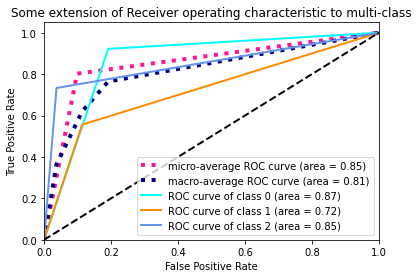

time: 442 ms


In [68]:
# Compute ROC curve and ROC area for each class
# Vypocitanie ROC curve a ROC oblasti pre kazdu triedu
lw = 2
n_classes = y_test_roc.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_pred_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_pred_roc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

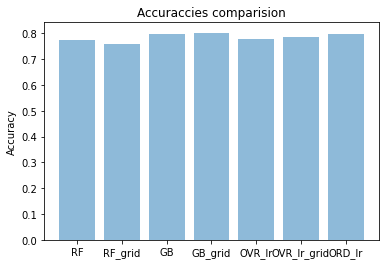

time: 196 ms


In [69]:
objects = np.array(models)  
y_pos = np.arange(len(objects))
performance = np.array(accuraccies)  

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuraccies comparision')

plt.show()

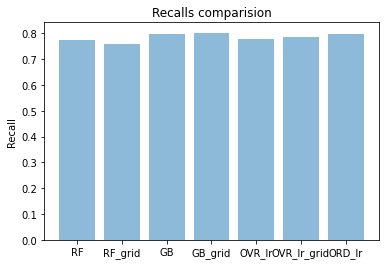

time: 203 ms


In [70]:
objects = np.array(models)  
y_pos = np.arange(len(objects))
performance = np.array(recalls)  

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Recall')
plt.title('Recalls comparision')

plt.show()

In [71]:
#colleration
df = hospital_df
df['Age Group']=df['Age Group'].astype('category').cat.codes
df['Gender']=df['Gender'].astype('category').cat.codes
df['Race']=df['Race'].astype('category').cat.codes
df['Type of Admission']=df['Type of Admission'].astype('category').cat.codes
df['Patient Disposition']=df['Patient Disposition'].astype('category').cat.codes
df['CCS Diagnosis Description']=df['CCS Diagnosis Description'].astype('category').cat.codes
df['CCS Procedure Description']=df['CCS Procedure Description'].astype('category').cat.codes
df['APR DRG Description']=df['APR DRG Description'].astype('category').cat.codes
df['APR MDC Description']=df['APR MDC Description'].astype('category').cat.codes
df['APR Severity of Illness Description']=df['APR Severity of Illness Description'].astype('category').cat.codes
df['APR Risk of Mortality']=df['APR Risk of Mortality'].astype('category').cat.codes
df['APR Medical Surgical Description']=df['APR Medical Surgical Description'].astype('category').cat.codes
df['Abortion Edit Indicator']=df['Abortion Edit Indicator'].astype('category').cat.codes
df['Emergency Department Indicator']=df['Emergency Department Indicator'].astype('category').cat.codes
df.corr()

,Age Group,Gender,Race,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Costs
Age Group,1.000000,0.017589,0.109866,-0.183502,0.304007,-0.072427,-0.044393,-0.057750,-0.443662,-0.143921,-0.085958,0.115604,-0.573748,-0.026122,0.334384,0.270794
Gender,0.017589,1.000000,0.008669,-0.013713,0.002731,-0.076350,-0.040178,-0.081160,-0.182279,-0.040769,-0.014531,-0.037798,0.053722,-0.035964,0.061306,0.064547
Race,0.109866,0.008669,1.000000,-0.003205,0.046578,0.004772,-0.023624,-0.010530,-0.007324,-0.020121,-0.021813,0.067196,0.004674,-0.022287,-0.057043,-0.024355
Type of Admission,-0.183502,-0.013713,-0.003205,1.000000,-0.054445,-0.005470,0.049766,0.053408,0.164841,-0.023128,-0.017874,-0.156367,0.212815,0.003644,-0.136756,-0.105571
Patient Disposition,0.304007,0.002731,0.046578,-0.054445,1.000000,-0.003093,-0.007296,-0.024478,-0.115835,-0.143579,-0.088793,0.025443,-0.130548,-0.015527,0.134025,0.198658
CCS Diagnosis Description,-0.072427,-0.076350,0.004772,-0.005470,-0.003093,1.000000,0.069836,0.313633,0.344854,0.001702,-0.051604,-0.086846,-0.009075,0.011162,-0.059629,-0.030452
CCS Procedure Description,-0.044393,-0.040178,-0.023624,0.049766,-0.007296,0.069836,1.000000,0.242538,0.156697,-0.063750,-0.063392,-0.158286,0.054294,-0.002014,0.064667,0.008623
APR DRG Description,-0.057750,-0.081160,-0.010530,0.053408,-0.024478,0.313633,0.242538,1.000000,0.281574,-0.065105,-0.061436,-0.115440,0.040294,-0.038476,-0.066030,-0.034163
APR MDC Description,-0.443662,-0.182279,-0.007324,0.164841,-0.115835,0.344854,0.156697,0.281574,1.000000,0.018795,-0.025147,-0.116485,0.371177,0.062213,-0.307155,-0.164366
APR Severity of Illness Description,-0.143921,-0.040769,-0.020121,-0.023128,-0.143579,0.001702,-0.063750,-0.065105,0.018795,1.000000,0.503532,0.014276,0.021091,0.012316,-0.104090,-0.281614


time: 4.78 s
